# 전처리

In [203]:
# 고객별, 분기별 구매 데이터 불러오기

cust_14_half1 = pd.read_csv('dataset/cust_14_half1.csv', encoding='utf-8')
cust_14_half2 = pd.read_csv('dataset/cust_14_half2.csv', encoding='utf-8')
cust_15_half1 = pd.read_csv('dataset/cust_15_half1.csv', encoding='utf-8')
cust_15_half2 = pd.read_csv('dataset/cust_15_half2.csv', encoding='utf-8')

# 인덱스를 고객번호로 지정
for i in [cust_14_half1, cust_14_half2, cust_15_half1, cust_15_half2]:
    i.set_index('고객번호', inplace = True)

In [204]:
# 거주지역 drop
cust_14_half1.drop('거주지역', axis = 1, inplace = True)
cust_14_half2.drop('거주지역', axis = 1, inplace = True)
cust_15_half1.drop('거주지역', axis = 1, inplace = True)
cust_15_half2.drop('거주지역', axis = 1, inplace = True)

# 마지막구매일자 datetime 변경
cust_14_half1.마지막구매일자 = cust_14_half1.마지막구매일자.astype('datetime64')
cust_14_half2.마지막구매일자 = cust_14_half2.마지막구매일자.astype('datetime64')
cust_15_half1.마지막구매일자 = cust_15_half1.마지막구매일자.astype('datetime64')
cust_15_half2.마지막구매일자 = cust_15_half2.마지막구매일자.astype('datetime64')

In [205]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cust_14_half1.성별 = le.fit_transform(cust_14_half1.성별)
cust_14_half2.성별 = le.transform(cust_14_half2.성별)
cust_15_half1.성별 = le.transform(cust_15_half1.성별)
cust_15_half2.성별 = le.transform(cust_15_half2.성별)

# One-hot Encoding
cust_14_half1 = pd.get_dummies(cust_14_half1)
cust_14_half2 = pd.get_dummies(cust_14_half2)
cust_15_half1 = pd.get_dummies(cust_15_half1)
cust_15_half2 = pd.get_dummies(cust_15_half2)

cust_14_half1.head(3)

,성별,멤버십가입여부,A구매금액비율,B구매금액비율,C구매금액비율,D구매금액비율,A방문횟수,B방문횟수,C방문횟수,D방문횟수,...,연령대_40세~44세,연령대_45세~49세,연령대_50세~54세,연령대_55세~59세,연령대_60세이상,주요구매시간대_낮,주요구매시간대_야간,주요구매시간대_오전,주요구매시간대_오후,주요구매시간대_저녁
고객번호,,,,,,,,,,,,,,,,,,,,,
1,1,0,0.988851,0.001094,0.010055,0.0,154.0,1.0,4.0,0.0,...,0,0,0,0,1,1,0,0,0,0
2,1,0,0.998746,0.001254,0.000000,0.0,187.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,0.093983,0.000000,0.906017,0.0,1.0,0.0,127.0,0.0,...,0,0,0,0,1,1,0,0,0,0


# 종속변수

In [206]:
r1 = (cust_15_half1['총구매금액'].mean()-cust_14_half1['총구매금액'].mean())/cust_15_half1['총구매금액'].mean()
r2 = (cust_15_half2['총구매금액'].mean()-cust_14_half1['총구매금액'].mean())/cust_15_half2['총구매금액'].mean()

y_train = ((cust_15_half1['총구매금액']-cust_14_half1['총구매금액'])/cust_15_half1['총구매금액']).map(lambda x:1 if x<r1 else 0)
y_test = ((cust_15_half2['총구매금액']-cust_14_half1['총구매금액'])/cust_15_half2['총구매금액']).map(lambda x:1 if x<r2 else 0)

y_train.rename('구매증감', inplace = True)
y_test.rename('구매증감', inplace = True)

고객번호
1        1
2        1
3        1
4        1
5        0
        ..
19379    0
19380    0
19381    0
19382    0
19383    0
Name: 구매증감, Length: 19336, dtype: int64

# 독립변수

## x_train 만들기

In [212]:
# 파생변수1. 제휴사별 구매금액비율 -> 제휴사별 구매금액비율평균, 구매금액비율증감율

x_train = cust_14_half2.copy()

x_train[['A구매금액비율평균', 'B구매금액비율평균', 'C구매금액비율평균', 'D구매금액비율평균']] = (cust_14_half2.iloc[:, 2:6] + cust_14_half1.iloc[:, 2:6])/2
x_train[['A구매금액비율증감율', 'B구매금액비율증감율', 'C구매금액비율증감율', 'D구매금액비율증감율']] = \
(cust_14_half2.iloc[:, 2:6]-cust_14_half1.iloc[:, 2:6])/((cust_14_half2.iloc[:, 2:6] + cust_14_half1.iloc[:, 2:6])/2)

In [214]:
# 파생변수5. 총구매금액 -> 총구매금액평균, 총구매금액증감율

x_train[['총구매금액평균']] = (cust_14_half2[['총구매금액']] + cust_14_half1[['총구매금액']])/2
x_train[['총구매금액증감율']] = (cust_14_half2[['총구매금액']] - cust_14_half1[['총구매금액']])/((cust_14_half2[['총구매금액']] + cust_14_half1[['총구매금액']])/2)

In [216]:
# 파생변수3. 제휴사별 방문횟수 -> 제휴사별 방문횟수평균, 방문횟수증감율

x_train[['A방문횟수평균', 'B방문횟수평균', 'C방문횟수평균', 'D방문횟수평균']] = (cust_14_half2.iloc[:, 6:10] + cust_14_half1.iloc[:, 6:10])/2
x_train[['A방문횟수증감율', 'B방문횟수증감율', 'C방문횟수증감율', 'D방문횟수증감율']] = \
(cust_14_half2.iloc[:, 6:10] - cust_14_half1.iloc[:, 6:10])/((cust_14_half2.iloc[:, 6:10] + cust_14_half1.iloc[:, 6:10])/2)

In [218]:
# 파생변수4. 제휴사별 상품구매개수 -> 제휴사별 상품구매개수평균, 상품구매개수증감율

x_train[['A상품구매개수평균', 'B상품구매개수평균', 'C상품구매개수평균', 'D상품구매개수평균']] = (cust_14_half2.iloc[:, 10:14] + cust_14_half1.iloc[:, 10:14])/2
x_train[['A상품구매개수증감율', 'B상품구매개수증감율', 'C상품구매개수증감율', 'D상품구매개수증감율']] = \
(cust_14_half2.iloc[:, 10:14] - cust_14_half1.iloc[:, 10:14])/((cust_14_half2.iloc[:, 10:14] + cust_14_half1.iloc[:, 10:14])/2)

In [222]:
# 파생변수10. 제휴사별 구매금액 -> 제휴사별 구매금액평균, 구매금액증감율

x_train[['A구매금액평균', 'B구매금액평균', 'C구매금액평균', 'D구매금액평균']] = (cust_14_half2.iloc[:, 19:23] + cust_14_half1.iloc[:, 19:23])/2
x_train[['A구매금액증감율', 'B구매금액증감율', 'C구매금액증감율', 'D구매금액증감율']] = \
(cust_14_half2.iloc[:, 19:23] - cust_14_half1.iloc[:, 19:23])/((cust_14_half2.iloc[:, 19:23] + cust_14_half1.iloc[:, 19:23])/2)

In [224]:
# 파생변수6. 방문점포종류수 -> 방문점포종류수평균, 방문점포종류수증감율

x_train[['방문점포종류수평균']] = (cust_14_half2[['방문점포종류수']] + cust_14_half1[['방문점포종류수']])/2
x_train[['방문점포종류수증감율']] = \
(cust_14_half2[['방문점포종류수']] - cust_14_half1[['방문점포종류수']])/((cust_14_half2[['방문점포종류수']] + cust_14_half1[['방문점포종류수']])/2)

In [226]:
# 파생변수8. 회당구매금액 -> 회당구매금액평균, 회당구매금액증감율

x_train[['회당구매금액평균']] = (cust_14_half2[['회당구매금액']] + cust_14_half1[['회당구매금액']])/2
x_train[['회당구매금액증감율']] = \
(cust_14_half2[['회당구매금액']] - cust_14_half1[['회당구매금액']])/((cust_14_half2[['회당구매금액']] + cust_14_half1[['회당구매금액']])/2)

In [228]:
# 파생변수9. 구매상품종류수 -> 구매상품종류수평균, 구매상품종류수증감율

x_train[['구매상품종류수평균']] = (cust_14_half2[['구매상품종류수']] + cust_14_half1[['구매상품종류수']])/2
x_train[['구매상품종류수증감율']] = \
(cust_14_half2[['구매상품종류수']] - cust_14_half1[['구매상품종류수']])/((cust_14_half2[['구매상품종류수']] + cust_14_half1[['구매상품종류수']])/2)

In [230]:
# 파생변수7. 마지막구매일자 -> recency(분기 마지막날과 마지막구매일자의 차)

x_train['recency'] = (pd.to_datetime('20150101', format = '%Y%m%d') - cust_14_half2['마지막구매일자']).map(lambda x: x.days)

In [232]:
# 파생변수12. 대대분류별 구매금액 -> 대대분류별 구매금액평균, 구매금액증감율

x_train[['1_구매금액평균', '2_구매금액평균', '3_구매금액평균', '4_구매금액평균', '5_구매금액평균', '6_구매금액평균', '7_구매금액평균', '8_구매금액평균', '9_구매금액평균', '10_구매금액평균', '11_구매금액평균','12_구매금액평균']] = \
(cust_14_half2[['1','2','3','4','5','6','7','8','9','10','11','12']] + cust_14_half1[['1','2','3','4','5','6','7','8','9','10','11','12']])/2

x_train[['1_구매금액증감율', '2_구매금액증감율', '3_구매금액증감율', '4_구매금액증감율', '5_구매금액증감율', '6_구매금액증감율', '7_구매금액증감율', '8_구매금액증감율', '9_구매금액증감율', '10_구매금액증감율', '11_구매금액증감율','12_구매금액증감율']] = \
(cust_14_half2[['1','2','3','4','5','6','7','8','9','10','11','12']]-cust_14_half1[['1','2','3','4','5','6','7','8','9','10','11','12']])/((cust_14_half2[['1','2','3','4','5','6','7','8','9','10','11','12']] + cust_14_half1[['1','2','3','4','5','6','7','8','9','10','11','12']])/2)

In [240]:
# 결측값 채우기
x_train.iloc[:, 74:] = x_train.iloc[:, 74:].fillna(0)

In [242]:
# 파생변수11. 대대분류별 구매순위 등급(4등급) -> net(등급의 차), sum(등급의 변화 총 합)

# 분기별 카테고리 랭크 데이터 분리
q1 = cust_14_half1[['1_1', '2_1', '3_1', '4_1', '5_1', '6_1', '7_1', '8_1', '9_1', '10_1', '11_1', '12_1']]
q2 = cust_14_half1[['1_2', '2_2', '3_2', '4_2', '5_2', '6_2', '7_2', '8_2', '9_2', '10_2', '11_2', '12_2']]
q3 = cust_14_half2[['1_1', '2_1', '3_1', '4_1', '5_1', '6_1', '7_1', '8_1', '9_1', '10_1', '11_1', '12_1']]
q4 = cust_14_half2[['1_2', '2_2', '3_2', '4_2', '5_2', '6_2', '7_2', '8_2', '9_2', '10_2', '11_2', '12_2']]

# 분기별 카테고리 랭크 컬럼명 통일
q1 = q1.rename({'1_1':'1', '2_1':'2', '3_1':'3', '4_1':'4',
       '5_1':'5', '6_1':'6', '7_1':'7', '8_1':'8', '9_1':'9', '10_1':'10', '11_1':'11', '12_1':'12'}, axis =1)
q2 = q2.rename({'1_2':'1', '2_2':'2', '3_2':'3', '4_2':'4',
       '5_2':'5', '6_2':'6', '7_2':'7', '8_2':'8', '9_2':'9', '10_2':'10', '11_2':'11', '12_2':'12'}, axis =1)
q3 = q3.rename({'1_1':'1', '2_1':'2', '3_1':'3', '4_1':'4',
       '5_1':'5', '6_1':'6', '7_1':'7', '8_1':'8', '9_1':'9', '10_1':'10', '11_1':'11', '12_1':'12'}, axis =1)
q4 = q4.rename({'1_2':'1', '2_2':'2', '3_2':'3', '4_2':'4',
       '5_2':'5', '6_2':'6', '7_2':'7', '8_2':'8', '9_2':'9', '10_2':'10', '11_2':'11', '12_2':'12'}, axis =1)

# net
x_train = x_train.merge((q4-q1).rename({'1':'1_net', '2':'2_net', '3':'3_net', '4':'4_net', '5':'5_net', '6':'6_net', '7':'7_net', '8':'8_net', '9':'9_net', '10':'10_net', '11':'11_net', '12':'12_net'}, axis = 1), how = 'left', on = '고객번호')

# sum
x_train = x_train.merge(((q4-q3).apply(abs)+(q3-q2).apply(abs)+(q2-q1).apply(abs)).rename({'1':'1_sum', '2':'2_sum', '3':'3_sum', '4':'4_sum', '5':'5_sum', '6':'6_sum', '7':'7_sum', '8':'8_sum', '9':'9_sum', '10':'10_sum', '11':'11_sum', '12':'12_sum'}, axis = 1), how = 'left', on = '고객번호')

In [256]:
# 기존 열 제거
x_train.drop(columns=x_train.iloc[:, 2:59].columns, inplace=True)
x_train.shape

(19182, 106)

In [257]:
# 독립변수, 종속변수에 null 값 있는 행 제거
x_train.dropna(inplace = True)
y_train.dropna(inplace = True)

## x_test 만들기

In [258]:
# 파생변수1. 제휴사별 구매금액비율 -> 제휴사별 구매금액비율평균, 구매금액비율증감율
x_test = cust_15_half1.copy()

x_test[['A구매금액비율평균', 'B구매금액비율평균', 'C구매금액비율평균', 'D구매금액비율평균']] = \
    (cust_15_half1.iloc[:, 2:6]+cust_14_half2.iloc[:, 2:6]+cust_14_half1.iloc[:, 2:6])/3
x_test[['A구매금액비율증감율', 'B구매금액비율증감율', 'C구매금액비율증감율', 'D구매금액비율증감율']] = \
    (cust_15_half1.iloc[:, 2:6]-cust_14_half1.iloc[:, 2:6])/((cust_15_half1.iloc[:, 2:6]+cust_14_half1.iloc[:, 2:6])/2)

In [259]:
# 파생변수5. 총구매금액 -> 총구매금액평균, 총구매금액증감율

x_test[['총구매금액평균']] = (cust_15_half1[['총구매금액']]+cust_14_half2[['총구매금액']]+cust_14_half1[['총구매금액']])/3
x_test[['총구매금액증감율']] = (cust_15_half1[['총구매금액']]-cust_14_half1[['총구매금액']])/((cust_15_half1[['총구매금액']]+cust_14_half1[['총구매금액']])/2)

In [260]:
# 파생변수3. 제휴사별 방문횟수 -> 제휴사별 방문횟수평균, 방문횟수증감율

x_test[['A방문횟수평균', 'B방문횟수평균', 'C방문횟수평균', 'D방문횟수평균']] = (cust_15_half1.iloc[:, 6:10]+cust_14_half2.iloc[:, 6:10]+cust_14_half1.iloc[:, 6:10])/3
x_test[['A방문횟수증감율', 'B방문횟수증감율', 'C방문횟수증감율', 'D방문횟수증감율']] = \
(cust_15_half1.iloc[:, 6:10]-cust_14_half1.iloc[:, 6:10])/((cust_15_half1.iloc[:, 6:10]+cust_14_half1.iloc[:, 6:10])/2)

In [261]:
# 파생변수4. 제휴사별 상품구매개수 -> 제휴사별 상품구매개수평균, 상품구매개수증감율

x_test[['A상품구매개수평균', 'B상품구매개수평균', 'C상품구매개수평균', 'D상품구매개수평균']] = (cust_15_half1.iloc[:, 10:14]+cust_14_half2.iloc[:, 10:14]+cust_14_half1.iloc[:, 10:14])/3
x_test[['A상품구매개수증감율', 'B상품구매개수증감율', 'C상품구매개수증감율', 'D상품구매개수증감율']] = \
(cust_15_half1.iloc[:, 10:14]-cust_14_half1.iloc[:, 10:14])/((cust_15_half1.iloc[:, 10:14]+cust_14_half1.iloc[:, 10:14])/2)

In [262]:
# 파생변수10. 제휴사별 구매금액 -> 제휴사별 구매금액평균, 구매금액증감율

x_test[['A구매금액평균', 'B구매금액평균', 'C구매금액평균', 'D구매금액평균']] = (cust_15_half1.iloc[:, 19:23]+cust_14_half2.iloc[:, 19:23]+cust_14_half2.iloc[:, 19:23])/3
x_test[['A구매금액증감율', 'B구매금액증감율', 'C구매금액증감율', 'D구매금액증감율']] = \
(cust_15_half1.iloc[:, 19:23]-cust_14_half1.iloc[:, 19:23])/((cust_15_half1.iloc[:, 19:23]+cust_14_half1.iloc[:, 19:23])/2)

In [263]:
# 파생변수6. 방문점포종류수 -> 방문점포종류수평균, 방문점포종류수증감율

x_test[['방문점포종류수평균']] = (cust_15_half1[['방문점포종류수']]+cust_14_half2[['방문점포종류수']]+cust_14_half1[['방문점포종류수']])/3
x_test[['방문점포종류수증감율']] = \
(cust_15_half1[['방문점포종류수']]-cust_14_half1[['방문점포종류수']])/((cust_15_half1[['방문점포종류수']]+cust_14_half1[['방문점포종류수']])/2)

In [264]:
# 파생변수8. 회당구매금액 -> 회당구매금액평균, 회당구매금액증감율

x_test[['회당구매금액평균']] = (cust_15_half1[['회당구매금액']]+cust_14_half2[['회당구매금액']]+cust_14_half1[['회당구매금액']])/3
x_test[['회당구매금액증감율']] = (cust_15_half1[['회당구매금액']]-cust_14_half1[['회당구매금액']])/((cust_15_half1[['회당구매금액']]+cust_14_half1[['회당구매금액']])/2)

In [265]:
# 파생변수9. 구매상품종류수 -> 구매상품종류수평균, 구매상품종류수증감율

x_test[['구매상품종류수평균']] = (cust_15_half1[['구매상품종류수']]+cust_14_half2[['구매상품종류수']]+cust_14_half1[['구매상품종류수']])/3
x_test[['구매상품종류수증감율']] = (cust_15_half1[['구매상품종류수']]-cust_14_half1[['구매상품종류수']])/((cust_15_half1[['구매상품종류수']]+cust_14_half1[['구매상품종류수']])/2)

In [266]:
# 파생변수7. 마지막구매일자 -> recency(분기 마지막날과 마지막구매일자의 차)

x_test['recency'] = (pd.to_datetime('20150101', format = '%Y%m%d') - cust_15_half1['마지막구매일자']).map(lambda x: x.days)

In [267]:
# 파생변수12. 대대분류별 구매금액 -> 대대분류별 구매금액평균, 구매금액증감율

x_test[['1_구매금액평균', '2_구매금액평균', '3_구매금액평균', '4_구매금액평균', '5_구매금액평균', '6_구매금액평균', '7_구매금액평균', '8_구매금액평균', '9_구매금액평균', '10_구매금액평균', '11_구매금액평균','12_구매금액평균']] = \
(cust_15_half1[['1','2','3','4','5','6','7','8','9','10','11','12']]+cust_14_half2[['1','2','3','4','5','6','7','8','9','10','11','12']]+cust_14_half1[['1','2','3','4','5','6','7','8','9','10','11','12']])/3

x_test[['1_구매금액증감율', '2_구매금액증감율', '3_구매금액증감율', '4_구매금액증감율', '5_구매금액증감율', '6_구매금액증감율', '7_구매금액증감율', '8_구매금액증감율', '9_구매금액증감율', '10_구매금액증감율', '11_구매금액증감율','12_구매금액증감율']] = \
(cust_15_half1[['1','2','3','4','5','6','7','8','9','10','11','12']]-cust_14_half1[['1','2','3','4','5','6','7','8','9','10','11','12']])/((cust_15_half1[['1','2','3','4','5','6','7','8','9','10','11','12']]+cust_14_half1[['1','2','3','4','5','6','7','8','9','10','11','12']])/2)

In [268]:
# 결측값 채우기
x_test.iloc[:, 74:] = x_test.iloc[:, 74:].fillna(0)

In [269]:
# 파생변수11. 대대분류별 구매순위 등급(4등급) -> net(등급의 차), sum(등급의 변화 총 합)

# 분기별 카테고리 랭크 데이터 분리
q1 = cust_14_half2[['1_1', '2_1', '3_1', '4_1', '5_1', '6_1', '7_1', '8_1', '9_1', '10_1', '11_1', '12_1']]
q2 = cust_14_half2[['1_2', '2_2', '3_2', '4_2', '5_2', '6_2', '7_2', '8_2', '9_2', '10_2', '11_2', '12_2']]
q3 = cust_15_half1[['1_1', '2_1', '3_1', '4_1', '5_1', '6_1', '7_1', '8_1', '9_1', '10_1', '11_1', '12_1']]
q4 = cust_15_half1[['1_2', '2_2', '3_2', '4_2', '5_2', '6_2', '7_2', '8_2', '9_2', '10_2', '11_2', '12_2']]

# 분기별 카테고리 랭크 컬럼명 통일
q1 = q1.rename({'1_1':'1', '2_1':'2', '3_1':'3', '4_1':'4',
       '5_1':'5', '6_1':'6', '7_1':'7', '8_1':'8', '9_1':'9', '10_1':'10', '11_1':'11', '12_1':'12'}, axis =1)
q2 = q2.rename({'1_2':'1', '2_2':'2', '3_2':'3', '4_2':'4',
       '5_2':'5', '6_2':'6', '7_2':'7', '8_2':'8', '9_2':'9', '10_2':'10', '11_2':'11', '12_2':'12'}, axis =1)
q3 = q3.rename({'1_1':'1', '2_1':'2', '3_1':'3', '4_1':'4',
       '5_1':'5', '6_1':'6', '7_1':'7', '8_1':'8', '9_1':'9', '10_1':'10', '11_1':'11', '12_1':'12'}, axis =1)
q4 = q4.rename({'1_2':'1', '2_2':'2', '3_2':'3', '4_2':'4',
       '5_2':'5', '6_2':'6', '7_2':'7', '8_2':'8', '9_2':'9', '10_2':'10', '11_2':'11', '12_2':'12'}, axis =1)

# 카테고리 net 반영
x_test = x_test.merge((q4-q1).rename({'1':'1_net', '2':'2_net', '3':'3_net', '4':'4_net', '5':'5_net', '6':'6_net', '7':'7_net', '8':'8_net', '9':'9_net', '10':'10_net', '11':'11_net', '12':'12_net'}, axis = 1), how = 'left', on = '고객번호')

# 카테고리 sum 반영
x_test = x_test.merge(((q4-q3).apply(abs)+(q3-q2).apply(abs)+(q2-q1).apply(abs)).rename({'1':'1_sum', '2':'2_sum', '3':'3_sum', '4':'4_sum', '5':'5_sum', '6':'6_sum', '7':'7_sum', '8':'8_sum', '9':'9_sum', '10':'10_sum', '11':'11_sum', '12':'12_sum'}, axis = 1), how = 'left', on = '고객번호')

In [270]:
# 기존 열 제거
x_test.drop(columns=x_test.iloc[:, 2:59].columns, inplace=True)
x_test.shape

(19255, 106)

In [271]:
# 독립변수, 종속변수에 null 값 있는 행 제거
x_test.dropna(inplace = True)
y_test.dropna(inplace = True)

In [272]:
# 종속변수 길이와 독립변수 길이 맞춰주기

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

y_train = x_train.merge(y_train, on = '고객번호', how = 'left')['구매증감']
y_test = x_test.merge(y_test, on = '고객번호', how = 'left')['구매증감']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(18931, 106) (19307,)
(19135, 106) (19336,)
(18931, 106) (18931,)
(19135, 106) (19135,)


In [273]:
# 결측값 확인

print(y_train.isnull().sum().sum())
print(y_test.isnull().sum().sum())

drop_index = y_test.isnull()[y_test.isnull()==True].index
x_test.drop(index=drop_index, inplace=True)

y_train.dropna(inplace = True)
y_test.dropna(inplace = True)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

0
1
(18931, 106) (18931,)
(19134, 106) (19134,)


# Scaling

In [290]:
# 스케일링(비율, 증감율은 제외)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# 훈련용 데이터셋 Fit
ss.fit(x_train[['총구매금액평균', 'A방문횟수평균', 'B방문횟수평균', 'C방문횟수평균','D방문횟수평균',
                'A상품구매개수평균','B상품구매개수평균', 'C상품구매개수평균', 'D상품구매개수평균',
                'A구매금액평균', 'B구매금액평균', 'C구매금액평균', 'D구매금액평균',
                '방문점포종류수평균', '회당구매금액평균', '구매상품종류수평균',
                'recency', '1_net', '2_net', '3_net', '4_net', '5_net', '6_net', '7_net', '8_net', '9_net', '10_net','11_net', '12_net',
                '1_sum', '2_sum', '3_sum', '4_sum', '5_sum','6_sum', '7_sum', '8_sum', '9_sum', '10_sum', '11_sum', '12_sum', 
                '1_구매금액평균', '2_구매금액평균', '3_구매금액평균', '4_구매금액평균', '5_구매금액평균', '6_구매금액평균', '7_구매금액평균', '8_구매금액평균', '9_구매금액평균', '10_구매금액평균', '11_구매금액평균','12_구매금액평균']])

# 훈련용, 테스트용 transform
x_train[['총구매금액평균', 'A방문횟수평균', 'B방문횟수평균', 'C방문횟수평균','D방문횟수평균',
                'A상품구매개수평균','B상품구매개수평균', 'C상품구매개수평균', 'D상품구매개수평균',
                'A구매금액평균', 'B구매금액평균', 'C구매금액평균', 'D구매금액평균',
                '방문점포종류수평균', '회당구매금액평균', '구매상품종류수평균',
                'recency', '1_net', '2_net', '3_net', '4_net', '5_net', '6_net', '7_net', '8_net', '9_net', '10_net','11_net', '12_net',
                '1_sum', '2_sum', '3_sum', '4_sum', '5_sum','6_sum', '7_sum', '8_sum', '9_sum', '10_sum', '11_sum', '12_sum', 
                '1_구매금액평균', '2_구매금액평균', '3_구매금액평균', '4_구매금액평균', '5_구매금액평균', '6_구매금액평균', '7_구매금액평균', '8_구매금액평균', '9_구매금액평균', '10_구매금액평균', '11_구매금액평균','12_구매금액평균']] = \
ss.transform(x_train[['총구매금액평균', 'A방문횟수평균', 'B방문횟수평균', 'C방문횟수평균','D방문횟수평균',
                'A상품구매개수평균','B상품구매개수평균', 'C상품구매개수평균', 'D상품구매개수평균',
                'A구매금액평균', 'B구매금액평균', 'C구매금액평균', 'D구매금액평균',
                '방문점포종류수평균', '회당구매금액평균', '구매상품종류수평균',
                'recency', '1_net', '2_net', '3_net', '4_net', '5_net', '6_net', '7_net', '8_net', '9_net', '10_net','11_net', '12_net',
                '1_sum', '2_sum', '3_sum', '4_sum', '5_sum','6_sum', '7_sum', '8_sum', '9_sum', '10_sum', '11_sum', '12_sum',
                '1_구매금액평균', '2_구매금액평균', '3_구매금액평균', '4_구매금액평균', '5_구매금액평균', '6_구매금액평균', '7_구매금액평균', '8_구매금액평균', '9_구매금액평균', '10_구매금액평균', '11_구매금액평균','12_구매금액평균']])

x_test[['총구매금액평균', 'A방문횟수평균', 'B방문횟수평균', 'C방문횟수평균','D방문횟수평균',
                'A상품구매개수평균','B상품구매개수평균', 'C상품구매개수평균', 'D상품구매개수평균',
                'A구매금액평균', 'B구매금액평균', 'C구매금액평균', 'D구매금액평균',
                '방문점포종류수평균', '회당구매금액평균', '구매상품종류수평균',
                'recency', '1_net', '2_net', '3_net', '4_net', '5_net', '6_net', '7_net', '8_net', '9_net', '10_net','11_net', '12_net',
                '1_sum', '2_sum', '3_sum', '4_sum', '5_sum','6_sum', '7_sum', '8_sum', '9_sum', '10_sum', '11_sum', '12_sum',
                '1_구매금액평균', '2_구매금액평균', '3_구매금액평균', '4_구매금액평균', '5_구매금액평균', '6_구매금액평균', '7_구매금액평균', '8_구매금액평균', '9_구매금액평균', '10_구매금액평균', '11_구매금액평균','12_구매금액평균']] = \
ss.transform(x_test[['총구매금액평균', 'A방문횟수평균', 'B방문횟수평균', 'C방문횟수평균','D방문횟수평균',
                'A상품구매개수평균','B상품구매개수평균', 'C상품구매개수평균', 'D상품구매개수평균',
                'A구매금액평균', 'B구매금액평균', 'C구매금액평균', 'D구매금액평균',
                '방문점포종류수평균', '회당구매금액평균', '구매상품종류수평균',
                'recency', '1_net', '2_net', '3_net', '4_net', '5_net', '6_net', '7_net', '8_net', '9_net', '10_net','11_net', '12_net',
                '1_sum', '2_sum', '3_sum', '4_sum', '5_sum','6_sum', '7_sum', '8_sum', '9_sum', '10_sum', '11_sum', '12_sum',
                '1_구매금액평균', '2_구매금액평균', '3_구매금액평균', '4_구매금액평균', '5_구매금액평균', '6_구매금액평균', '7_구매금액평균', '8_구매금액평균', '9_구매금액평균', '10_구매금액평균', '11_구매금액평균','12_구매금액평균']])

# Modeling
- Boosting(XGB, lgbm, Cat, AdaBoost), Logistic Regression, Decision Tree, RF, SVM, KNeighbors 의 분류모델 사용

In [291]:
!pip install catboost

You should consider upgrading via the 'C:\anaconda3\envs\cakd3\python.exe -m pip install --upgrade pip' command.


In [292]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings 
warnings.filterwarnings('ignore')

model1 = XGBClassifier()
model2 = LGBMClassifier()
model3 = CatBoostClassifier(silent=True)
model4 = AdaBoostClassifier()
model5 = LogisticRegression()
model6 = DecisionTreeClassifier()
model7 = RandomForestClassifier()
model8 = SVC()
model9 = KNeighborsClassifier()

for model in [model1, model2, model3, model4, model5, model6, model7, model8, model9]:
    model.fit(x_train, y_train)
    print(model.__class__.__name__, 'Train Accuracy: {0:.4f}'.format(model.score(x_train, y_train)))
    print(model.__class__.__name__, 'Test Accuracy: {0:.4f}'.format(model.score(x_test, y_test)),"\n")

# Train, Test Accuracy를 고려하여 LGBMClassifier, CatBoostClassifier, RandomForestClassifier로 모델 선정

[19:13:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier Train Accuracy: 0.9425
XGBClassifier Test Accuracy: 0.7234 

LGBMClassifier Train Accuracy: 0.8244
LGBMClassifier Test Accuracy: 0.7400 

CatBoostClassifier Train Accuracy: 0.8520
CatBoostClassifier Test Accuracy: 0.7383 

AdaBoostClassifier Train Accuracy: 0.7339
AdaBoostClassifier Test Accuracy: 0.7380 

LogisticRegression Train Accuracy: 0.7300
LogisticRegression Test Accuracy: 0.6946 

DecisionTreeClassifier Train Accuracy: 1.0000
DecisionTreeClassifier Test Accuracy: 0.6425 

RandomForestClassifier Train Accuracy: 1.0000
RandomForestClassifier Test Accuracy: 0.7348 

SVC Train Accuracy: 0.8029
SVC Test Accuracy: 0.5132 

KNeighborsClassifier Train Accuracy: 0.7564
KNeighborsClassifier Test Accuracy: 0.6219 



# 변수선택
- 변수 갯수: 총 106개
1. 성별
2. 멤버십 가입여부
3. 연령대(10)
4. 주요구매시간대(5)
5. A~D구매금액비율평균(4)
6. A~D구매금액비율증감율(4)
7. 총구매금액평균
8. 총구매금액증감율
9. A~D방문횟수평균(4)
10. A~D방문횟수증감율(4)
11. A~D상품구매개수평균(4)
12. A~D상품구매개수증감율(4)
13. A~D구매금액평균(4)
14. A~D구매금액증감율(4)
15. 방문점포종류수평균
16. 방문점포종류수증감율
17. 회당구매금액평균
18. 회당구매금액증감율
19. 구매상품종류수평균
20. 구매상품종류수증감율
21. recency
22. 1~12구매금액평균(12)
23. 1~12구매금액증감율(12)
24. 1~12net
25. 1~12sum

## 1. 변수 갯수: 59개

In [293]:
# 모델별 Feature Importance 파악

df_fi = pd.DataFrame(model2.feature_importances_, index=x_train.columns, columns=['LGBMClassifier'])
df_fi['CatBoostClassifier'] = model3.feature_importances_
df_fi['RandomForestClassifier'] = model7.feature_importances_
df_fi = df_fi.sort_values(by='LGBMClassifier')

# 각 모델의 Q2보다 작은 Feature는 제외
under_q2 = df_fi[(df_fi['LGBMClassifier']<=df_fi['LGBMClassifier'].quantile(0.5))\
        & (df_fi['CatBoostClassifier']<=df_fi['CatBoostClassifier'].quantile(0.5))\
        & (df_fi['RandomForestClassifier']<=df_fi['RandomForestClassifier'].quantile(0.5))]
print(under_q2.index)
under_q2

Index(['12_sum', '8_net', '12_net', '주요구매시간대_낮', '8_sum', '연령대_19세이하', '6_net',
       '연령대_45세~49세', '연령대_60세이상', '연령대_20세~24세', '연령대_25세~29세', 'D방문횟수증감율',
       '연령대_30세~34세', 'D상품구매개수증감율', 'D구매금액비율증감율', '6_sum', '7_sum',
       'D상품구매개수평균', '주요구매시간대_야간', '연령대_50세~54세', '멤버십가입여부', '9_net',
       'D구매금액증감율', '7_net', '연령대_40세~44세', '주요구매시간대_오전', '11_net', 'D방문횟수평균',
       '연령대_55세~59세', '10_sum', '5_net', '1_net', '주요구매시간대_오후', '주요구매시간대_저녁',
       '5_sum', '10_net', '성별', '연령대_35세~39세', '3_sum', '4_net', '4_sum',
       'D구매금액평균', '1_sum', 'D구매금액비율평균', '11_sum', '2_sum'],
      dtype='object')


,LGBMClassifier,CatBoostClassifier,RandomForestClassifier
12_sum,0,0.000000,0.000000
8_net,0,0.000000,0.000000
12_net,0,0.000000,0.000000
주요구매시간대_낮,0,0.083275,0.001596
8_sum,0,0.000000,0.000000
연령대_19세이하,0,0.010694,0.000072
6_net,1,0.139139,0.002404
연령대_45세~49세,1,0.108627,0.001826
연령대_60세이상,1,0.084211,0.001259
연령대_20세~24세,1,0.011116,0.000237


In [294]:
# 1. 총 변수 59개(=106-47)
# 제외변수: 연령대(10개), 주요구매시간대(5개), 1_sum~12_sum(12개), 1_net~12_net(12개), D사관련(8개)

x_train.drop(columns=x_train.columns[2:17].to_list()+x_train.columns[-24:].to_list(), inplace=True)
x_train = x_train[[i for i in x_train.columns.to_list() if 'D' not in i]]

x_test.drop(columns=x_test.columns[2:17].to_list()+x_test.columns[-24:].to_list(), inplace=True)
x_test = x_test[[i for i in x_test.columns.to_list() if 'D' not in i]]

print(f'변수 갯수: {len(x_train.columns)}')

model1 = XGBClassifier()
model2 = LGBMClassifier()
model3 = CatBoostClassifier(silent=True)
model4 = AdaBoostClassifier()
model5 = LogisticRegression()
model6 = DecisionTreeClassifier()
model7 = RandomForestClassifier()

for model in [model1, model2, model3, model4, model5, model6, model7]:
    model.fit(x_train, y_train)
    print(model.__class__.__name__, 'Train Accuracy: {0:.4f}'.format(model.score(x_train, y_train)))
    print(model.__class__.__name__, 'Test Accuracy: {0:.4f}'.format(model.score(x_test, y_test)),"\n")

### 변수 106개인 모델과 비교시 Test Accuracy가 소폭 상승

변수 갯수: 59
[19:17:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier Train Accuracy: 0.9356
XGBClassifier Test Accuracy: 0.7245 

LGBMClassifier Train Accuracy: 0.8205
LGBMClassifier Test Accuracy: 0.7434 

CatBoostClassifier Train Accuracy: 0.8474
CatBoostClassifier Test Accuracy: 0.7419 

AdaBoostClassifier Train Accuracy: 0.7340
AdaBoostClassifier Test Accuracy: 0.7393 

LogisticRegression Train Accuracy: 0.7303
LogisticRegression Test Accuracy: 0.7224 

DecisionTreeClassifier Train Accuracy: 1.0000
DecisionTreeClassifier Test Accuracy: 0.6434 

RandomForestClassifier Train Accuracy: 1.0000
RandomForestClassifier Test Accuracy: 0.7298 



## 2. 변수 갯수: 38개

In [295]:
# 모델별 Feature Importance 파악2

df_fi = pd.DataFrame(model2.feature_importances_, index=x_train.columns, columns=['LGBMClassifier'])
df_fi['CatBoostClassifier'] = model3.feature_importances_
df_fi['RandomForestClassifier'] = model7.feature_importances_
df_fi = df_fi.sort_values(by='LGBMClassifier')

# 각 모델의 Q2보다 작은 Feature는 제외
under_q2 = df_fi[(df_fi['LGBMClassifier']<=df_fi['LGBMClassifier'].quantile(0.5))\
        & (df_fi['CatBoostClassifier']<=df_fi['CatBoostClassifier'].quantile(0.5))\
        & (df_fi['RandomForestClassifier']<=df_fi['RandomForestClassifier'].quantile(0.5))]
print(under_q2.index)
under_q2

Index(['멤버십가입여부', '성별', 'recency', 'C구매금액증감율', 'C상품구매개수증감율', 'A구매금액비율증감율',
       'C방문횟수증감율', '방문점포종류수평균', 'C상품구매개수평균', '12_구매금액증감율', 'C구매금액비율증감율',
       '8_구매금액증감율', 'C구매금액비율평균', '7_구매금액증감율', '12_구매금액평균', '방문점포종류수증감율',
       'A구매금액비율평균', 'B방문횟수증감율', 'C구매금액평균', 'B구매금액비율증감율', '5_구매금액증감율',
       '7_구매금액평균'],
      dtype='object')


,LGBMClassifier,CatBoostClassifier,RandomForestClassifier
멤버십가입여부,6,0.172570,0.001650
성별,7,0.304751,0.002017
recency,19,1.021435,0.006906
C구매금액증감율,19,0.531580,0.010300
C상품구매개수증감율,19,0.694301,0.009768
A구매금액비율증감율,22,0.951487,0.013399
C방문횟수증감율,23,0.572204,0.009199
방문점포종류수평균,24,1.230654,0.011212
C상품구매개수평균,26,0.985547,0.011400
12_구매금액증감율,26,0.756251,0.006288


In [297]:
# 2. 총 변수 38개(=106-47-21)
# 제외변수 추가: A,B,C구매금액평균(3개), 방문점포종류수평균, 방문점포종류수증감율, recency, 회당구매금액평균
# A,B,C구매금액비율평균(3개), A,B,C구매금액비율증감율(3개), A,B,C방문횟수증감율(3개), A,B,C상품구매개수증감율(3개), 구매상품종류수평균, 구매상품종류수증감율

x_train.drop(columns=['A구매금액평균','B구매금액평균','C구매금액평균', '방문점포종류수평균', '방문점포종류수증감율', 'recency', '회당구매금액평균'], inplace=True)
for exclude in ['구매금액비율평균', '구매금액비율증감율', '방문횟수증감율', '상품구매개수증감율', '구매상품']:
    x_train = x_train[[i for i in x_train.columns.to_list() if exclude not in i]]

x_test.drop(columns=['A구매금액평균','B구매금액평균','C구매금액평균', '방문점포종류수평균', '방문점포종류수증감율', 'recency', '회당구매금액평균'], inplace=True)
for exclude in ['구매금액비율평균', '구매금액비율증감율', '방문횟수증감율', '상품구매개수증감율', '구매상품']:
    x_test = x_test[[i for i in x_test.columns.to_list() if exclude not in i]]

print(f'변수 갯수: {len(x_train.columns)}')

model1 = XGBClassifier()
model2 = LGBMClassifier()
model3 = CatBoostClassifier(silent=True)
model4 = AdaBoostClassifier()
model5 = LogisticRegression()
model6 = DecisionTreeClassifier()
model7 = RandomForestClassifier()

for model in [model1, model2, model3, model4, model5, model6, model7]:
    model.fit(x_train, y_train)
    print(model.__class__.__name__, 'Train Accuracy: {0:.4f}'.format(model.score(x_train, y_train)))
    print(model.__class__.__name__, 'Test Accuracy: {0:.4f}'.format(model.score(x_test, y_test)),"\n")

### 변수 59개인 모델과 Train, Test Accuracy 비교시 큰 변화 없음

변수 갯수: 38
[19:20:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier Train Accuracy: 0.9285
XGBClassifier Test Accuracy: 0.7320 

LGBMClassifier Train Accuracy: 0.8158
LGBMClassifier Test Accuracy: 0.7400 

CatBoostClassifier Train Accuracy: 0.8456
CatBoostClassifier Test Accuracy: 0.7391 

AdaBoostClassifier Train Accuracy: 0.7326
AdaBoostClassifier Test Accuracy: 0.7355 

LogisticRegression Train Accuracy: 0.7263
LogisticRegression Test Accuracy: 0.7339 

DecisionTreeClassifier Train Accuracy: 1.0000
DecisionTreeClassifier Test Accuracy: 0.6575 

RandomForestClassifier Train Accuracy: 1.0000
RandomForestClassifier Test Accuracy: 0.7394 



## 3. 변수 갯수: 14개

In [299]:
# 모델별 Feature Importance 파악3

df_fi = pd.DataFrame(model2.feature_importances_, index=x_train.columns, columns=['LGBMClassifier'])
df_fi['CatBoostClassifier'] = model3.feature_importances_
df_fi['RandomForestClassifier'] = model7.feature_importances_
df_fi = df_fi.sort_values(by='LGBMClassifier')

# 각 모델의 Q2보다 작은 Feature는 제외
under_q2 = df_fi[(df_fi['LGBMClassifier']<=df_fi['LGBMClassifier'].quantile(0.5))\
        & (df_fi['CatBoostClassifier']<=df_fi['CatBoostClassifier'].quantile(0.5))\
        & (df_fi['RandomForestClassifier']<=df_fi['RandomForestClassifier'].quantile(0.5))]
print(under_q2.index)
under_q2

Index(['멤버십가입여부', '성별', '8_구매금액증감율', 'C구매금액증감율', '12_구매금액증감율', '7_구매금액증감율',
       '12_구매금액평균', '5_구매금액증감율', '6_구매금액평균', 'B상품구매개수평균', '7_구매금액평균',
       'C상품구매개수평균', '6_구매금액증감율', '5_구매금액평균', '11_구매금액증감율', '10_구매금액증감율',
       '8_구매금액평균'],
      dtype='object')


,LGBMClassifier,CatBoostClassifier,RandomForestClassifier
멤버십가입여부,3,0.265914,0.002689
성별,4,0.344943,0.002905
8_구매금액증감율,26,0.775478,0.010418
C구매금액증감율,29,1.691138,0.017555
12_구매금액증감율,29,1.005379,0.008328
7_구매금액증감율,32,1.550586,0.013683
12_구매금액평균,49,1.777798,0.010234
5_구매금액증감율,52,1.647387,0.015379
6_구매금액평균,52,1.577302,0.018432
B상품구매개수평균,53,2.038951,0.021754


In [309]:
# 3. 총 변수 14개(=106-47-21-24)
# 제외변수 추가: 대분류별구매금액평균(12개), 대분류별구매금액증감율(12개)

x_train = x_train.iloc[:, :14]
x_test = x_test.iloc[:, :14]

print(f'변수 갯수: {len(x_train.columns)}')

model1 = XGBClassifier()
model2 = LGBMClassifier()
model3 = CatBoostClassifier(silent=True)
model4 = AdaBoostClassifier()
model5 = LogisticRegression()
model6 = DecisionTreeClassifier()
model7 = RandomForestClassifier()

for model in [model1, model2, model3, model4, model5, model6, model7]:
    model.fit(x_train, y_train)
    print(model.__class__.__name__, 'Train Accuracy: {0:.4f}'.format(model.score(x_train, y_train)))
    print(model.__class__.__name__, 'Test Accuracy: {0:.4f}'.format(model.score(x_test, y_test)),"\n")

### 변수 38개인 모델과 비교시 Train Accuracy 소폭 하락, Test Accuracy는 큰 변화가 없음

변수 갯수: 14
[19:24:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier Train Accuracy: 0.8560
XGBClassifier Test Accuracy: 0.7292 

LGBMClassifier Train Accuracy: 0.7865
LGBMClassifier Test Accuracy: 0.7422 

CatBoostClassifier Train Accuracy: 0.8037
CatBoostClassifier Test Accuracy: 0.7414 

AdaBoostClassifier Train Accuracy: 0.7323
AdaBoostClassifier Test Accuracy: 0.7375 

LogisticRegression Train Accuracy: 0.7248
LogisticRegression Test Accuracy: 0.7336 

DecisionTreeClassifier Train Accuracy: 1.0000
DecisionTreeClassifier Test Accuracy: 0.6479 

RandomForestClassifier Train Accuracy: 1.0000
RandomForestClassifier Test Accuracy: 0.7363 



In [310]:
# GridSearchCV로 하이퍼 파라미터 선정

from sklearn.model_selection import GridSearchCV
lgbm = LGBMClassifier()
params = {
    'learning_rate' : [0.01, 0.015, 0.1, 0.5],
    'num_leaves': [5, 10, 15, 30],
    'max_depth' : [-1, 5, 10]
}

grid_lgbm = GridSearchCV(lgbm, param_grid=params, scoring='accuracy', cv=5, refit=True)
grid_lgbm.fit(x_train, y_train)
print(grid_lgbm)
print(lgbm.__class__.__name__,'Best Hyper Parameters:', grid_lgbm.best_params_)
print(lgbm.__class__.__name__,'Best Accuracy: {0:.4f}'.format(grid_lgbm.best_score_))

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.015, 0.1, 0.5],
                         'max_depth': [-1, 5, 10],
                         'num_leaves': [5, 10, 15, 30]},
             scoring='accuracy')
LGBMClassifier Best Hyper Parameters: {'learning_rate': 0.1, 'max_depth': -1, 'num_leaves': 5}
LGBMClassifier Best Accuracy: 0.7295


In [311]:
# 최종 모델 선정

model = grid_lgbm
print(model.__class__.__name__, 'Train Accuracy: {0:.4f}'.format(model.score(x_train, y_train)))
print(model.__class__.__name__, 'Test Accuracy: {0:.4f}'.format(model.score(x_test, y_test)))

GridSearchCV Train Accuracy: 0.7394
GridSearchCV Test Accuracy: 0.7436


# 군집분석

In [312]:
# 매출이 감소한 고객 대상 군집분석 실시
d_cust = x_test[model.predict(x_test) == 1]
print(len(d_cust))

9493


In [313]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [314]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

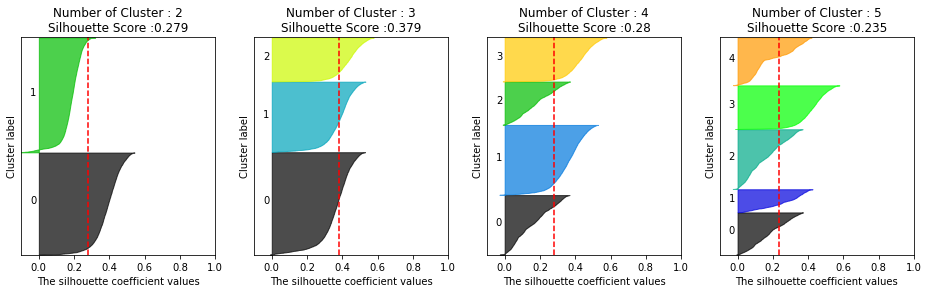

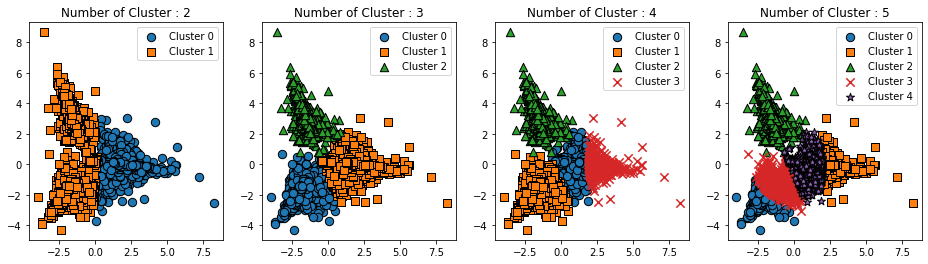

In [315]:
# cluster 개수가 2,3,4,5개 일때 클러스터별 실루엣 계수 평균값을 시각화 
import numpy as np
import matplotlib.pyplot as plt

visualize_silhouette([2,3,4,5], d_cust)
visualize_kmeans_plot_multi([2,3,4,5], d_cust)

### cluster 개수는 3개가 적절

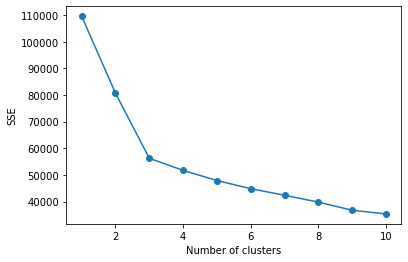

In [316]:
from sklearn.cluster import KMeans
def elbow(x):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
        km.fit(x)
        sse.append(km.inertia_)
    plt.plot(range(1, 11), sse, marker = 'o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.show()
elbow(d_cust)

### 3인 지점부터 기울기가 급격히 변화하므로, cluster 개수는 3개가 적절

In [317]:
# 각 군집별 Feature의 평균값 파악

km = KMeans(n_clusters=3, init = 'k-means++', random_state=0)
km.fit(d_cust)
d_cust['cluster'] = km.labels_
d_cust.groupby('cluster').mean()

,성별,멤버십가입여부,총구매금액평균,총구매금액증감율,A방문횟수평균,B방문횟수평균,C방문횟수평균,A상품구매개수평균,B상품구매개수평균,C상품구매개수평균,A구매금액증감율,B구매금액증감율,C구매금액증감율,회당구매금액증감율
cluster,,,,,,,,,,,,,,
0,0.165293,0.207396,0.430946,-0.323816,1.170263,-0.652042,-0.455921,1.146236,-0.561043,-0.419236,-0.343007,0.026148,0.014943,-0.207469
1,0.178456,0.390006,-0.236928,-0.238617,-0.733233,1.380588,-0.480239,-0.707327,1.304294,-0.467970,-0.241997,-0.178435,-0.025470,-0.118296
2,0.193548,0.188866,-0.279746,-0.209513,-0.812971,-0.754810,2.026525,-0.772249,-0.719452,1.942601,-0.213203,-0.124641,-0.134296,-0.106052
